## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

# Introdução

## Nome: João Pedro Farjoun Silva
## N° USP: 13731319

### Observações:
- Quis deixar a análise bem completa, mas posso ter deixado longa demais...
- Tentei deixar tudo de forma bem bonitinha, então usei algumas ferramentas para me ajudarem a formatar o Markdown.
- Usei o código de MLGs de contagem e Regularização em modelos lineares como base
- Dei ênfase nas informações importantes deixando em **negrito** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sneeze5.csv')
df = df.iloc[:, 1:]

df

/home/joao/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,nsneeze,alcohol,antihist,smoker,age,pollen
0,7,0,1,0,23.0,41.889975
1,17,1,0,1,26.0,46.703039
2,56,0,0,0,18.0,57.574885
3,35,0,0,1,19.0,42.053782
4,23,0,0,0,18.0,55.208805
...,...,...,...,...,...,...
845,30,0,1,1,33.0,72.282306
846,4,1,1,0,29.0,31.734540
847,50,0,1,0,29.0,134.725193
848,29,0,0,0,41.0,75.382218


In [2]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


# **1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


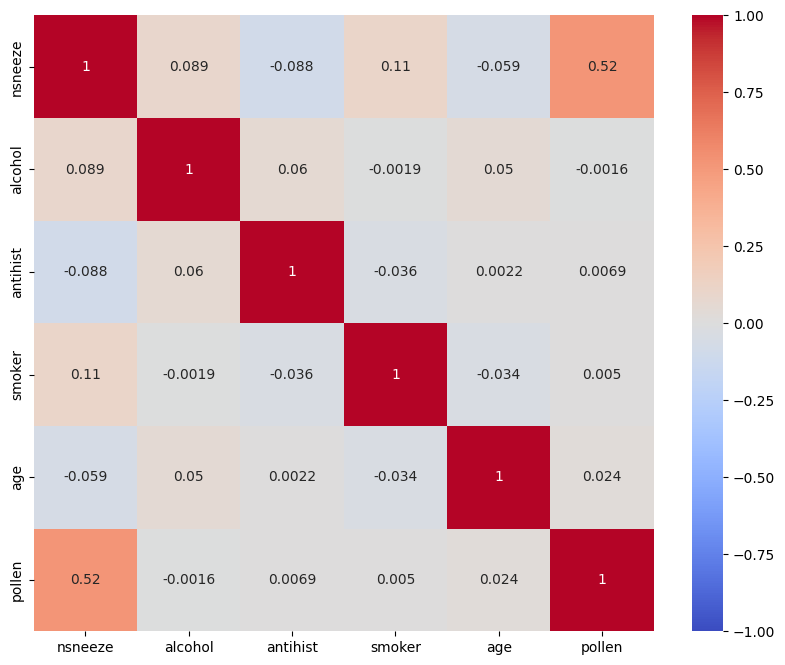

In [3]:
# Matriz de correlações
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

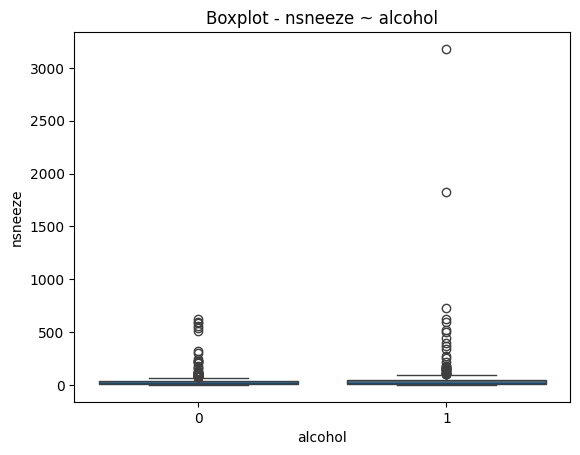

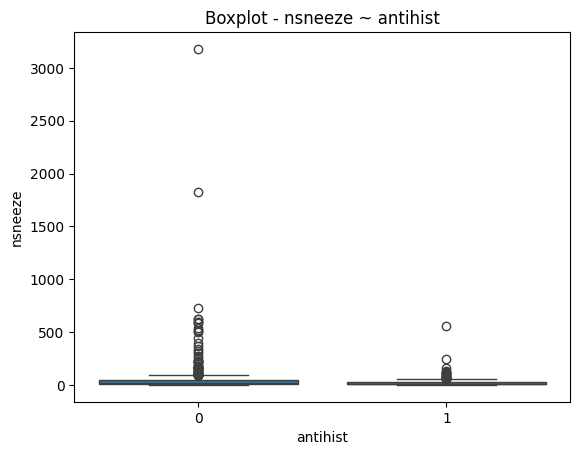

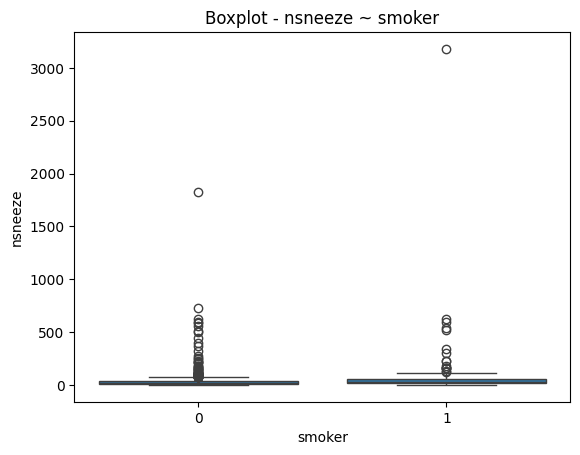

In [4]:
binarias = ['alcohol','antihist','smoker']
nao_binarias = ['age','pollen']


for col in binarias:
    plt.figure()
    sns.boxplot(y = df['nsneeze'], x = df[col])
    plt.title(f'Boxplot - nsneeze ~ {col}')
    plt.show()

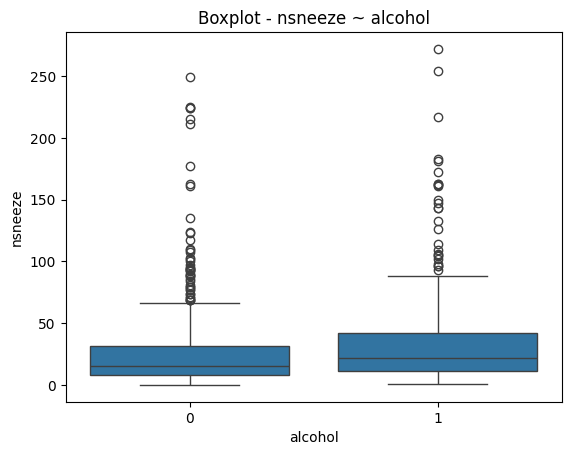

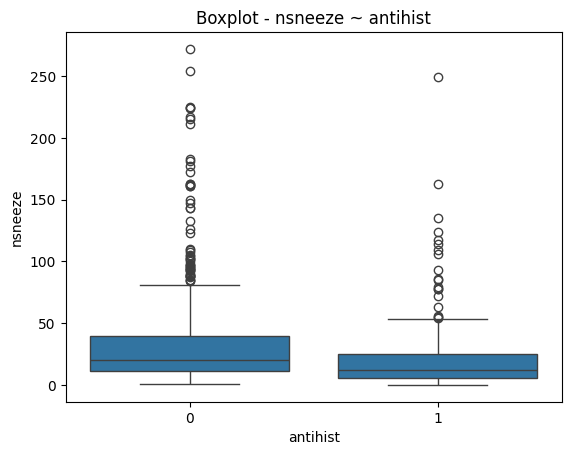

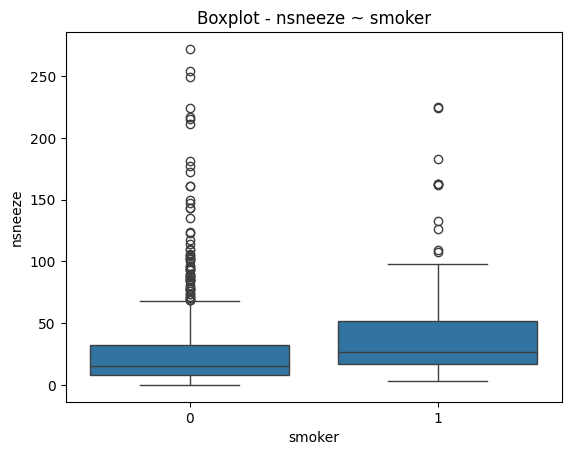

In [5]:
# Versão mais próxima
df_menor = df.copy()
df_menor = df_menor[df_menor['nsneeze'] <= 300]

for col in binarias:
    plt.figure()
    sns.boxplot(y = df_menor['nsneeze'], x = df[col])
    plt.title(f'Boxplot - nsneeze ~ {col}')
    plt.show()

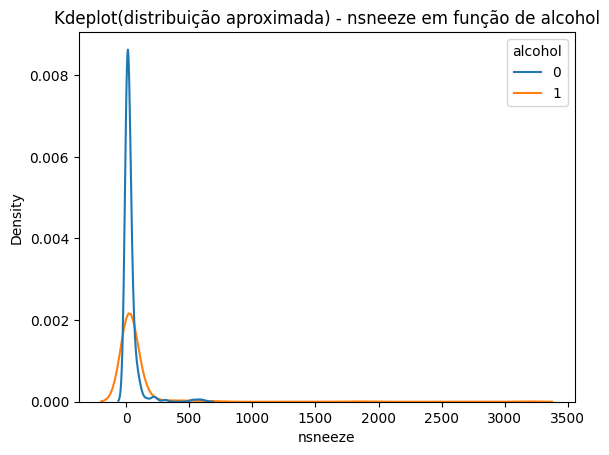

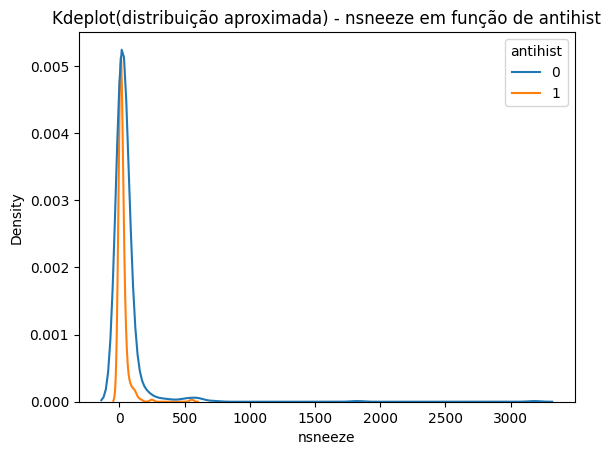

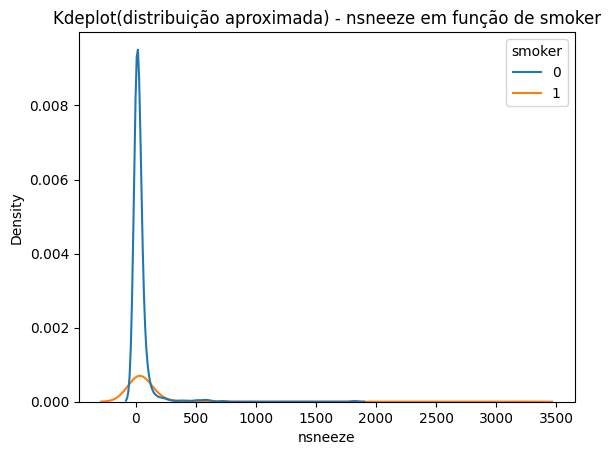

In [6]:
for col in binarias:
    plt.figure()
    sns.kdeplot(x = df['nsneeze'], hue = df[col])
    plt.title(f'Kdeplot(distribuição aproximada) - nsneeze em função de {col}')
    plt.show()

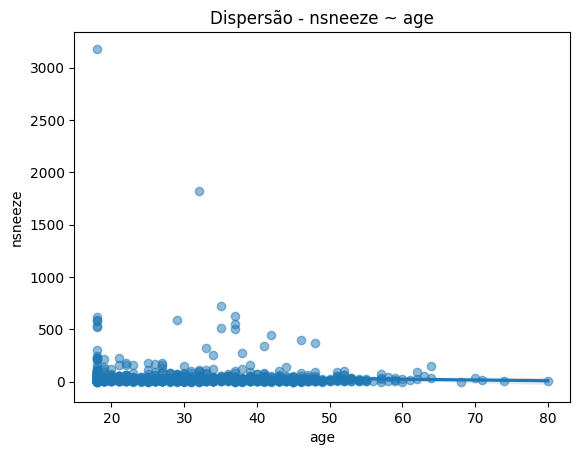

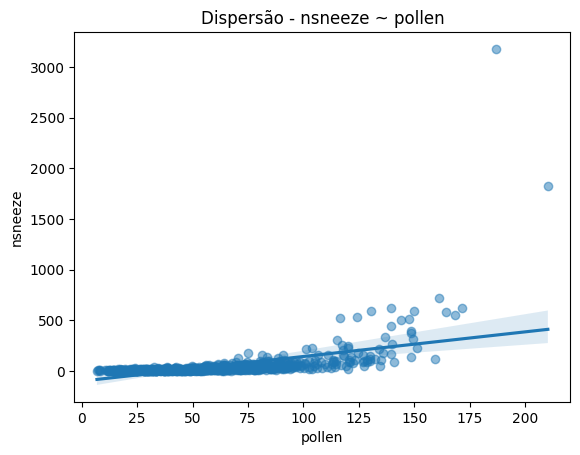

In [7]:
for col in nao_binarias:
    plt.figure()
    sns.regplot(x=col, y='nsneeze', data=df, scatter_kws={'alpha':0.5})
    plt.title(f'Dispersão - nsneeze ~ {col}')
    plt.show()

# Análise Exploratória da Variável `nsneeze`

Nessa etapa do trabalho, foi pedido que nós fizéssemos uma análise exploratória dos dados. Logo, iremos interpretar os gráficos de dispersão, boxplots e heatmap envolvendo a variável `nsneeze`, a nossa variável de interesse. Na nossa análise (no caso, minha análise, mas usar o 'nós' parece mais bonito), dividimos as variáveis em categóricas(binárias) e não categóricas(não binárias), já que cada tipo exige gráficos diferentes para conseguirmos analisar com propriedade como estão distribuídos os dados.

---


## 1. Heatmap de Correlações

| Variável   | Correlação com `nsneeze` |
|------------|---------------------------|
| pollen | <span style="color:#006400; font-weight:bold;">0.52</span> |
| alcohol    | <span style="color:#88cc88;">0.089</span> |
| smoker     | <span style="color:#88cc88;">0.11</span> |
| antihist   | <span style="color:#ff9999;">-0.088</span> |
| age        | <span style="color:#ffbbbb;">-0.059</span> |


**Observações:**

- `pollen` é a única variável com correlação relativamente relevante com `nsneeze`.
- `age` aparenta não influenciar muito `nsneeze`.
- Todas as variáveis binárias têm correlação muito fraca.
- Dessa maneira, podemos inferir que o comportamento de `nsneeze` é motivado principalmente pela variável `pollen`.

---

## 2. Relação entre `nsneeze` e `age`

- Os valores de `nsneeze` se mantêm baixos para todas as idades. Isso se confirma pelo regplot, em que a linha se mantém baixa, aparentemente sem inclinação, não importando a idade.
- Mesmo assim, podermos perceber a presença de outliers altos distribuídos que aparentam diminuir conforme se aumenta a idade.
- Iremos confirmar sua significância no modelo ao analisarmos o p-valor de seu $\beta$ correspondente.

---

## 3. Relação entre `nsneeze` e `pollen`

- A tendência geral é de aumento de `nsneeze` conforme os níveis de pólen aumentam, o que faz sentido logicamente.
- Para valores baixos de pólen, `nsneeze` tende a ser baixo.
- Com níveis mais altos de pólen, aparecem mais casos de espirros altos.
- Ainda que em pequenas quantidades, há a presença de outliers altos, principalmente quando se tem uma alta quantidade de pollen.
- Dessa maneira, pollen parece ter uma relação positiva com `nsneeze`, como podemos perceber pela inclinação da reta no regplot.

---

## 4. Análise dos Gráficos - `nsneeze` (Número de Espirros) vs Variáveis Binárias

---

### Boxplots: Distribuição de `nsneeze` por Grupo

#### `nsneeze` vs `antihist` (Uso de Anti-histamínico)

- **Grupo 0 (Não usa):** Mediana aproximada de **35**. Apresenta outliers extremos (chegando a >3000).
- **Grupo 1 (Usa):** Mediana aproximada de **20**.
- **Análise:** A mediana de quem usa o medicamento é inferior. Dito isso, o uso do anti-histamínico parece 'diminuir' os casos extremos, já que seus outliers são bem menores se comparados ao grupo que não usa.

#### `nsneeze` vs `smoker` (Fumante)

- **Grupo 0 (Não fumante):** Mediana aproximada de **20**.
- **Grupo 1 (Fumante):** Mediana aproximada de **30**.
- **Análise:** Fumantes apresentam mediana superior. Embora ambos os grupos tenham outliers extremos na mesma faixa, o deslocamento da caixa ,da distribuição,  para cima no grupo de fumantes sugere que o tabagismo tem uma relação visível com o aumento do número de espirros.

#### `nsneeze` vs `alcohol` (Uso de Álcool)

- **Grupo 0 (Não usa álcool):** Mediana aproximada de **20**.
- **Grupo 1 (Usa álcool):** Mediana aproximada de **25**.
- **Análise:** Há um leve aumento na mediana para usuários de álcool. Ao contrário do anti-histamínico, o grupo que consome álcool (Grupo 1) apresenta os outliers mais extremos do gráfico, indicando que o álcool pode estar associado a casos esporádicos de crises intensas de espirros.
---

###  Gráficos de Densidade (KDE)

####  `nsneeze` em função de `alcohol`

- **Observação**: As curvas de densidade (Grupo 0 e Grupo 1) estão quase completamente sobrepostas no pico principal, ambas exibindo forte assimetria positiva, mesmo com a diferença de densidade.
- **Conclusão(levando em conta o boxplot)**: A sobreposição do KDE confirma que o álcool não altera a distribuição da maioria dos dados. Seu efeito é principalmente na cauda da distribuição, nos outliers, sendo responsável pelos picos esporádicos e extremos de espirros.

####  `nsneeze` em função de `antihist`

- **Observação**: As distribuições são extremamente similares, mas a curva do Grupo 1 (uso) é ligeiramente mais estreita e alta no pico.
- **Conclusão(levando em conta o boxplot)**: O KDE estreito valida o achado do Boxplot, já que ao desconsiderar os outliers (redução de dispersão), a densidade da massa de dados restante se torna mais concentrada em valores baixíssimos, confirmando que o anti-histamínico age para suprimir a frequência de espirros, especialmente os casos mais graves(o que faz sentido logicamente).

####  `nsneeze` em função de `smoker`

- **Observação**: A curva dos fumantes (Grupo 1) é visivelmente mais "achatada" e larga do que a curva dos não-fumantes (pico alto e estreito).
- **Conclusão(levando em conta o boxplot)**: O KDE achatado e deslocado para a direita valida perfeitamente o Boxplot, já que o tabagismo aumenta a variabilidade e diminui a concentração de dados em valores muito baixos, distribuindo a frequência por uma faixa maior de espirros. Isso nos faz acreditar que fumar altera o perfil de risco de forma consistente.
  
---

## 5. Conclusão Geral da Análise Exploratória

A análise exploratória da variável de interesse, `nsneeze`, revelou as seguintes relações:

- `pollen`: A variável `pollen` aparenta ser o fator com maior relevância, demonstrando a correlação positiva mais forte (0.52). Os gráficos confirmam que `nsneeze` aumenta de forma consistente conforme os níveis de pólen sobem.
- `smoker`: O tabagismo (`smoker`) é o preditor binário mais notável. O deslocamento superior da mediana e a maior dispersão (achatamento do KDE) indicam que ser fumante está associado a uma elevação consistente no número de espirros.
- `alcohol`: O `alcohol` mostrou um efeito fraco na distribuição central (KDE sobreposto), mas uma influência clara nos extremos. O uso de álcool está associado ao surgimento dos maiores outliers de `nsneeze`.
- `antihist`: Embora com correlação baixa, o `antihist` demonstrou um efeito esperado, já que ele reduz a mediana e elimina os outliers extremos, concentrando a distribuição em valores muito baixos.
- `age`: A `age` mostrou-se pouco relevante na predição de `nsneeze`, com uma correlação próxima a zero, e os gráficos de dispersão não indicam nenhuma tendência. No entanto, observa-se que os outliers diminuem conforme esse parâmetro aumenta.

---


# **2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis **alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

## Apresente e interprete:

- ### A estimativa dos coeficientes,
- ### Sua significância estatística.


In [8]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [9]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [10]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                  850
Model:                            GLM   Df Residuals:                      844
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5243.5
Date:                Mon, 01 Dec 2025   Deviance:                       6416.9
Time:                        23:19:36   Pearson chi2:                 6.61e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5704      0.021  

## Significância

**Olhando para os valores do p-valor(todos menores que 0.001), percebemos que todos os $\beta$ são significativos**.

In [11]:
names_param = ['C(alcohol)[T.1]', 'C(antihist)[T.1]', 'C(smoker)[T.1]', 'age', 'pollen']
all_names = ['alcohol', 'antihist', 'smoker', 'age', 'pollen']
params = ajuste_pois.params
for i in range(len(names_param)):
    print(f'Razão de taxas de β_{all_names[i]}: {np.exp(params[names_param[i]])}')

Razão de taxas de β_alcohol: 1.4157999254052274
Razão de taxas de β_antihist: 0.5505075316095287
Razão de taxas de β_smoker: 1.954293533223382
Razão de taxas de β_age: 0.9873442831115076
Razão de taxas de β_pollen: 1.0305269744553374


## Interpretação dos coeficientes no modelo de regressão Poisson

No modelo de regressão Poisson com função de ligação log, assumimos:

$$
Y_i \sim \text{Poisson}(\mu_i), \qquad 
\log(\mu_i) = \beta_0 + \beta_1 x_{1i} + \cdots + \beta_p x_{pi}
$$

ou equivalentemente:

$$
\mu_i = \exp(\beta_0 + \beta_1 x_{1i} + \cdots + \beta_p x_{pi})
$$

---

### Interpretação dos coeficientes

Para variáveis explicativas (exceto o intercepto), a razão de taxas é dada por:

$$
\exp(\beta_j) = \frac{\mu(x_j + 1)}{\mu(x_j)}
$$

---

### **Intercepto (β₀)**

- β_Intercept = 1.5704, então:

    → Quando todas as variáveis estão no nível de referência (variáveis binárias = 0 e variáveis contínuas = 0), a contagem esperada de nsneeze é **1.5704**.

---

### **Coeficientes com interpretação pela razão de taxas**

- β_alcohol = 0.3477 e razão de taxas de β_alcohol = 1.4158

  → `exp(β_alcohol) ≈ 1.4158`: indivíduos com `alcohol = 1` têm **aumento de ~41.6%** na quantidade esperada de espirros em relação ao grupo `alcohol = 0`.

---

- β_antihist = -0.5969 e razão de taxas de β_antihist = 0.5505

  → `exp(β_antihist) ≈ 0.5505`: tomar antihistamínico reduz a contagem esperada em **~44.95%**, comparado a quem não toma.

---

- β_smoker = 0.6700 e razão de taxas de β_smoker = 1.9543

  → `exp(β_smokerT) ≈ 1.9543`: fumantes têm, em média, **~95.4% mais espirros** do que não fumantes.

---

- β_age = -0.0127 e razão de taxas de β_age = 0.9873

  → Cada aumento de **1 unidade** em `age` reduz a quantidade esperada de espirros em **~1.27%**.

---

- β_pollen = 0.0301 e razão de taxas de β_pollen = 1.0305

  → Cada aumento de **1 unidade** em `pollen` aumenta os espirros esperados em **~3.05%**.

---

### **Conclusão geral**

O modelo indica que:

- ser **fumante** é o fator que mais tem impacto dentre as categóricas;  
- **pólen** aumenta a taxa de espirros (pequeno efeito por unidade, mas grande quando acumulado, já que é contínua e não categórica);  
- **álcool** também aumenta bastante a quantidade esperada de espirros;  
- **antihistamínico** reduz bastante a quantidade esperada de espirros;  
- **idade** reduz levemente a taxa de espirros(não é categórica assim como o pólen, logo possui um bom efeito quando acumulado, ainda que em menor escala).

---



# **3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

## Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [12]:
deviance = ajuste_pois.deviance
df_resid = ajuste_pois.df_resid
dispersion = deviance / df_resid
dispersion

7.60291594462535

In [13]:
df['nsneeze'].mean(), df['nsneeze'].var()

(45.22588235294118, 21302.848799279436)

In [14]:
df['nsneeze'].var()/df['nsneeze'].mean()

471.03224284344

In [15]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

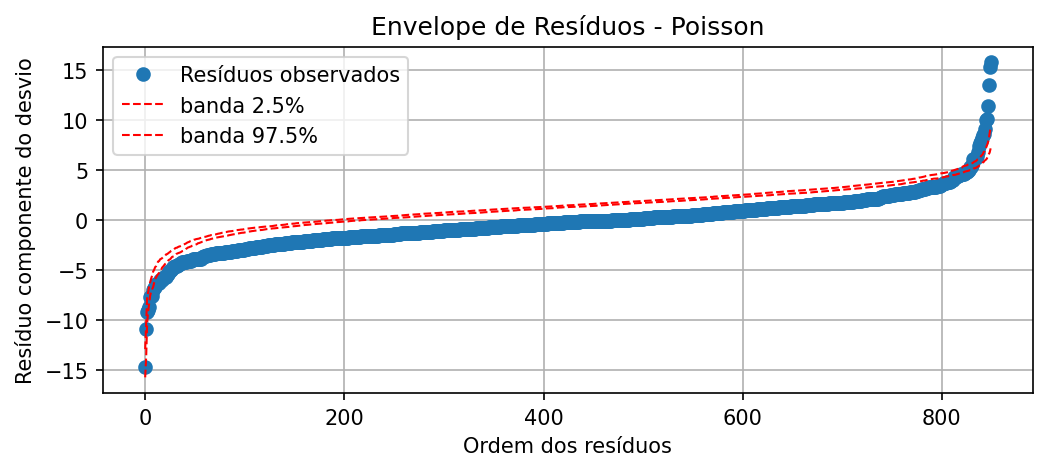

In [16]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

## Métodos usados

### Dispersão, usando Deviance

#### Definição

Seja a seguinte definição de Dispersão:

$$
\hat{\phi}_D = \frac{D}{n - p},
$$

onde:
- $D$ é o Deviance do modelo.
- $n$ é o número de observações,
- $p$ é o número de parâmetros no modelo.

Critérios usados:

- $\hat{\phi}_D \approx 1$: modelo Poisson adequado  
- $\hat{\phi}_D > 1.5$: indícios de superdispersão  
- $\hat{\phi}_D > 2$: superdispersão forte

#### Resultado obtido

- Com base no modelo, o $\hat{\phi}_D$ que obtemos foi aproximadamente $7.603$, o que indica uma superdisperão fortíssima. Essa conclusão é reforçada ao olharmos para a média e variâncoa de `nsneeze`, já que a variância($\approx 21302.85$) é diversas vezes maior(mais do que 400 vezes) a média($\approx 45.23$) e ela deveria ser igual na Poisson ($Var(Y) = E(Y) = \lambda$).
- Dito isso, essa variância extremamente alta pode ser atríbuida à média baixa(a maior parte das pessoas espirra pouco) e a presença de outliers gigantescos.


### Envelope de Resíduos

#### Definição

É um método visual, em que os resíduos observados devem ficar dentrodas bandas(linhas pontilhadas). Caso não esteja, configura superdispersão.

#### Resultado obtido 

- Como podemos observar, os resíduos ficaram, na sua grande maioria, fora das bandas desenhadas. Dessa maneira, podemos acreditar que o modelo apresenta uma grande superdispersão.

## Conclusão

**O modelo apresenta superdispersão** (bastante alta por sinal). Com isso, o que podemos tentar fazer é usar outros modelos para ver se os dados são melhores ajustados. Dessa maneira, iremos ajustar um modelo Binomial Negativo e comparar seu desempenho com o que obtemos usando a Poisson.

---

# **4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

- ## desvio (deviance),
- ## AIC,
- ## gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                  850
Model:                            GLM   Df Residuals:                      844
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3142.6
Date:                Mon, 01 Dec 2025   Deviance:                       777.09
Time:                        23:43:18   Pearson chi2:                     752.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9985
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4942      0.064  

In [29]:
deviance_nb = ajuste_nb.deviance
df_resid_nb = ajuste_nb.df_resid
dispersion_nb = deviance_nb / df_resid_nb
dispersion_nb

0.9207285577888369

In [30]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


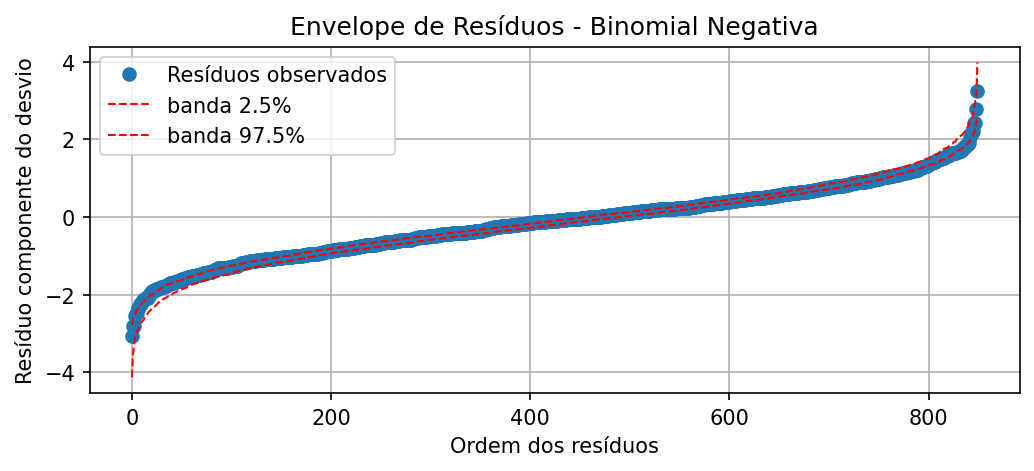

In [31]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

## Análise Negativa Binomial

### Dispersão, usando Deviance

#### Definição

Seja a seguinte definição de Dispersão:

$$
\hat{\phi}_D = \frac{D}{n - p},
$$

onde:
- $D$ é o Deviance do modelo.
- $n$ é o número de observações,
- $p$ é o número de parâmetros no modelo.

Critérios usados:


- $\hat{\phi}_D \approx 1$: modelo NB adequado  
- $\hat{\phi}_D > 1.2$: leve superdispersão residual  
- $\hat{\phi}_D > 1.5$: superdispersão residual moderada  
- $\hat{\phi}_D > 2$: forte superdispersão residual  


#### Resultado obtido

- Com base no modelo NB, o $\hat{\phi}_D$ que obtemos foi aproximadamente $0.921$, o que indica que o modelo NB aparenta ser adequado nesse caso. Iremos confirmar isso melhor ao analisarmos o envelope de resíduos.


### Envelope de Resíduos

#### Definição

É um método visual, em que os resíduos observados devem ficar dentrodas bandas(linhas pontilhadas). Caso não esteja, configura superdispersão.

#### Resultado obtido 

- Como podemos observar, os resíduos ficaram, praticamente todos, dentro das bandas desenhadas. Dessa maneira, podemos acreditar que o modelo é adequado para o ajuste dos dados que temos.

### Conclusão

**O modelo usando a Negativa Binomial é adequado**. Isso é confirmado pelo gráfico do envelope e pelo valor de $\hat{\phi}_D$. Confirmaremos que esse modelo é melhor que o que usa a Poisson abaixo com a comparação das AIC.

---

In [32]:
print('AIC Poisson:',ajuste_pois.aic)
print('AIC Negativa Binomial:',ajuste_nb.aic)

AIC Poisson: 10499.06563173229
AIC Negativa Binomial: 6297.189432074618


## Comparação entre modelos

### AIC
#### Definição

O **AIC (Akaike Information Criterion)** mede o equilíbrio entre qualidade do ajuste e complexidade do modelo. Nele, quanto menor o AIC, melhor o modelo(na comparação entre modelos).

#### Resultado obtido

Obtemos que:

- AIC Poisson $\approx 10499.06$
- AIC Negativa Binomial $\approx 6297.19$

### Conclusão

Logo, como podemos perceber, o AIC da Negativa Binomial foi consideravelmente menor que o AIC da Poisson. **Dessa maneira, temos evdiências suficientes para considerar o modelo usando a Negativa Binomial como o mais adequado nesse caso**.

---



# **5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

- ## do consumo de álcool (**alcohol**) sobre o número médio de espirros,
- ## do uso de anti-histamínico (**antihist**).


In [33]:
marginais = ajuste_nb.get_margeff(at='overall', method='dydx')

print(marginais.summary())

         GLM Marginal Effects        
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(alcohol)[T.1]     17.0874      1.764      9.684      0.000      13.629      20.546
C(antihist)[T.1]   -26.7061      2.132    -12.525      0.000     -30.885     -22.527
C(smoker)[T.1]      25.0117      2.188     11.429      0.000      20.723      29.301
age                 -0.4507      0.071     -6.379      0.000      -0.589      -0.312
pollen               1.3398      0.065     20.585      0.000       1.212       1.467


## Interpretação

### Definição 

O **efeito médio marginal (Average Marginal Effect — AME)** mede a variação média esperada na média de $Y$ quando uma covariável $x$ aumenta uma unidade (ou muda de categoria), mantendo todo o restante igual.  

Em modelos não lineares (como no nosso caso), o efeito do preditor depende dos valores das covariáveis; por isso o AME corresponde à média dos efeitos marginais individuais calculados para cada observação da amostra:

$$
AME = \frac{1}{n}\sum_{i=1}^n \frac{\partial \mathbb{E}[Y_i|X_i]}{\partial x_i}.
$$

Ele representa o **impacto médio** de cada variável sobre a resposta.

### Resultado obtido

- `alcohol`: o AME da covariável alcohol é de aproximadamente 17.08, o que significa que, em média, quando alcohol passa de 0 para 1, o número esperado de espirros aumenta em aproximadamente 17.08 espirros(mantendo todas as outras variáveis constantes). Logo, o uso de alcohol aumenta, em média, o número de espirros (faz sentido, eu pesquisei um pouco sobre isso...).
- `antihist`: o AME da covariável antihist é de aproximadamente -26.71, o que significa que, em média, quando a pessoa usa antihist, o número esperado de espirros diminui em aproximadamente 26.71 espirros(mantendo todas as outras variáveis constantes). Logo, o uso de anti-histêmicos diminui, em média, o número de espirros (faz sentido).

### Conclusão

**O modelo e os AMEs dessas variáveis fazem sentido, levando em conta o que cada variável representa**.
  
---

# **6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

- ### o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

- ### o Erro Absoluto Médio (EAM).

## Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

- ### qual deles apresenta melhor desempenho preditivo fora da amostra;

- ### em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [65]:
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Divide o conjunto
train_df, test_df = train_test_split(df, test_size=0.20, random_state=2) # mesma random _state 2 para garantir mesma divisão

print(train_df.shape, test_df.shape)

(680, 6) (170, 6)


In [66]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=train_df,
    family=sm.families.Poisson()
).fit()

print(modelo_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                  680
Model:                            GLM   Df Residuals:                      674
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4097.7
Date:                Mon, 01 Dec 2025   Deviance:                       4949.6
Time:                        23:53:03   Pearson chi2:                 5.17e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5699      0.024  

In [67]:
alpha_fixado = 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=train_df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
).fit()

print(modelo_nb.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                  680
Model:                            GLM   Df Residuals:                      674
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2493.3
Date:                Mon, 01 Dec 2025   Deviance:                       600.15
Time:                        23:53:04   Pearson chi2:                     589.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9987
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5325      0.072  

In [68]:
test_df["pred_pois"] = modelo_pois.predict(test_df)
test_df["pred_nb"]   = modelo_nb.predict(test_df)

mae_pois = mean_absolute_error(test_df["nsneeze"], test_df["pred_pois"])
mae_nb   = mean_absolute_error(test_df["nsneeze"], test_df["pred_nb"])

mse_pois = mean_squared_error(test_df["nsneeze"], test_df["pred_pois"])
mse_nb   = mean_squared_error(test_df["nsneeze"], test_df["pred_nb"])

print("MAE Poisson:", mae_pois)
print("MAE NB:", mae_nb)

print("==============================")

print("MSE Poisson:", mse_pois)
print("MSE NB:", mse_nb)

MAE Poisson: 16.145043401855755
MAE NB: 15.216892561068912
MSE Poisson: 1333.1157115681367
MSE NB: 1068.9634893988255


## Resultado obtido (seed = 2)

### Mean Absolute Error(MAE) ou Erro Absoluto Médio(EAM)

- Poisson $\approx$ 16.145
- NB $\approx$ 15.216

### Mean Squared Error(MSE) ou Erro Quadrático Médio(EQM)

- Poisson $\approx$ 1333.115
- NB $\approx$ 1068.963

## Conclusão

- Sabendo que, quanto menor o erro, melhor o desempenho do modelo, temos que tanto o MSE quanto o MAE no conjunto de teste são menores para o modelo usando a Binomial Negativa. 
- Assim como ocorreu com os critérios de ajuste (AIC e deviance), as análises utilizando o erro também apontam que o modelo Binomial Negativo é o mais adequado.
- **Logo, as conclusões baseadas no erro coincidem com as feitas com base no AIC e deviance**.

## Obs:
- Testando com outras seeds de divisão(1 e 3, por exemplo), obtemos casos em que MSE e MAE são menores no modelo Poisson, contradizendo as conclusões baseadas em AIC e deviance. **Logo, a forma como dividimos os dados também é muito importante na hora de fazer o modelo**.

---

# **7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

## 1. Indivíduo A:

   - alcohol = 0,
   - antihist = 1,
   - smoker = 0,
   - age = 30 anos,
   - pollen = valor correspondente a um dia de baixa concentração.

## 2. Indivíduo B:

   - alcohol = 1,
   - antihist = 0,
   - smoker = 1,
   - age = 50 anos,
   - pollen = valor correspondente a um dia de alta concentração.

## 3. Indivíduo A* (para ver influência do `pollen`):

   - alcohol = 0,
   - antihist = 1,
   - smoker = 0,
   - age = 30 anos,
   - pollen = valor correspondente a um dia de alta concentração.

## 2. Indivíduo B* (para ver influência do `pollen`):

   - alcohol = 1,
   - antihist = 0,
   - smoker = 1,
   - age = 50 anos,
   - pollen = valor correspondente a um dia de baixa concentração.

In [74]:
individuos = pd.DataFrame({
    "Indivíduos": ["Indivíduo A", "Indíviduo B", "Indivíduo A*", "Indivíduo B*"],
    "alcohol": [0,1,0,1],
    "antihist": [1,0,1,0],
    "smoker": [0,1,0,1],
    "age": [30,50,30,50],
    "pollen": [df['pollen'].min(),df['pollen'].max(),df['pollen'].max(), df['pollen'].min()] #considerando baixa concentração como o mínimo, e alta concentração o máximo
})

individuos["pred_nb"] = modelo_nb.predict(individuos)
print(individuos)

     Indivíduos  alcohol  antihist  smoker  age      pollen      pred_nb
0   Indivíduo A        0         1       0   30    6.876659     2.243657
1   Indíviduo B        1         0       1   50  210.301477  3799.487927
2  Indivíduo A*        0         1       0   30  210.301477   979.980257
3  Indivíduo B*        1         0       1   50    6.876659     8.698897


## Resultado obtido

### Indivíduo A $\approx$ 3 espirros

### Indivíduo B $\approx$ 3800 espirros (não vai conseguir respirar de tanto espirro...)

### Indivíduo A* $\approx$ 980 espirros

### Indivíduo B* $\approx$ 9 espirros

Com esses resultados, conseguimos perceber a influência que a variável `pollen` tem no valor da predição de `nsneeze`, confirmando assim o que foi visto e dito na parte da análise exploratória dos dados.

#### Obs: Arredondei para cima